In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [33]:
# 모든 피쳐에 대한 산점도 그리기
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

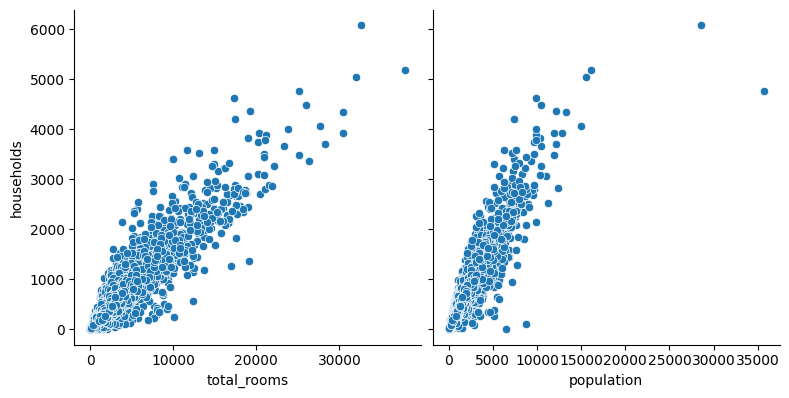

In [13]:
sns.pairplot(df, x_vars=['total_rooms','population'], y_vars=['households'], height=4)

In [64]:
total_rooms_population_copy = df[['total_rooms','population']].copy().astype(np.float32)
households_copy = df['households'].copy()

In [65]:

households_list = list(households_copy)

In [66]:
total_rooms_population_array = np.array(total_rooms_population_copy)
households_array = np.array(households_list)

In [67]:
total_rooms_population_array = total_rooms_population_array /10000
households_array = households_array / 1000

In [68]:
#(2) hypothesis
W = tf.Variable(tf.random.normal([2,1]), name='weight', mean=0.0) #초기값이고 tf.random_nornal()없어짐
b = tf.Variable(tf.random.normal([1]), name='bias',mean=0.0)

def hypothesis(x):
  #x = tf.cast(x, tf.float32)
  z=tf.matmul(x, W) + b # data type float로 변환
  sigmoid=1/(1+tf.exp(-z))
  return sigmoid

#(3) cost function
def cost_fn(H,Y):
  cost = -tf.reduce_mean(Y*tf.math.log(H) + (1-Y)*tf.math.log(1-H))
  return cost

#(4) stoohastic gradient decent algorithm to minimize cost function
optimizer = tf.optimizers.SGD(learning_rate=0.01)
#(5) run
def train():    #tf.Session() 대신에 tf.function으로 변경
  #tf.GradientTape를 사용하여 모델을 훈련, 자동 미분을 위한 tf.GradientTape함수를 사용
  with tf.GradientTape() as g:
    pred = hypothesis(total_rooms_population_array)
    cost = cost_fn(pred, households_array)

  #gradient 계산
  gradients = g.gradient(cost,[W, b])
  #print("gradientd = ",np.array(gradients))

  #gradients에 따라 W와 b업데이트
  optimizer.apply_gradients(zip(gradients,[W,b]))

In [81]:
for step in range(2001):
  #W&b업데이트 위한 학습(최적화) 과정 실행
  train()

  #display
  if step%5==0:
    pred = hypothesis(total_rooms_population_array)
    cost=cost_fn(pred,households_array)
    #print("step=%i, cost=%f, W=%f, b=%f" %(step+1,cost,W.numpy(), b.numpy()))
    print("step={}, cost={}, W={}, b={}" .format(step+1,cost,W.numpy(), b.numpy()))

step=1, cost=0.6960042715072632, W=[[-0.13438669]
 [ 0.22955738]], b=[0.15820396]
step=6, cost=0.6959285736083984, W=[[-0.13486248]
 [ 0.22928877]], b=[0.15633553]
step=11, cost=0.6958549618721008, W=[[-0.13533127]
 [ 0.2290239 ]], b=[0.15449223]
step=16, cost=0.695783257484436, W=[[-0.13579316]
 [ 0.22876276]], b=[0.15267369]
step=21, cost=0.6957135796546936, W=[[-0.13624825]
 [ 0.22850528]], b=[0.15087964]
step=26, cost=0.6956456899642944, W=[[-0.13669662]
 [ 0.22825141]], b=[0.14910969]
step=31, cost=0.6955795884132385, W=[[-0.13713837]
 [ 0.22800109]], b=[0.14736354]
step=36, cost=0.6955153346061707, W=[[-0.13757357]
 [ 0.2277543 ]], b=[0.14564088]
step=41, cost=0.6954528093338013, W=[[-0.13800232]
 [ 0.22751097]], b=[0.14394139]
step=46, cost=0.6953919529914856, W=[[-0.1384247 ]
 [ 0.22727107]], b=[0.14226477]
step=51, cost=0.6953327059745789, W=[[-0.13884082]
 [ 0.22703451]], b=[0.14061067]
step=56, cost=0.695275068283081, W=[[-0.13925074]
 [ 0.2268013 ]], b=[0.13897882]
step=61,

KeyboardInterrupt: 

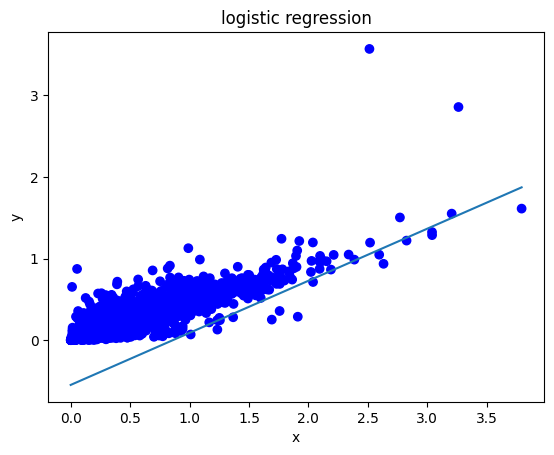

In [82]:
import matplotlib.pyplot as plt
import numpy as np
w_hat = W.numpy()
b_hat = b.numpy()

slope = w_hat[0]/w_hat[1]
#(6) visualiztion(시각화)

xx = np.linspace(np.min(total_rooms_population_array[:,0]), np.max(total_rooms_population_array[:,0]))
yy = -slope*xx - b_hat/w_hat[1]

colors = ['red' if l==0 else 'blue' for l in households_array]
plt.title("logistic regression")
plt.xlabel("x")
plt.ylabel("y")
plt.ylabel("y")
plt.scatter(total_rooms_population_array[:,0], total_rooms_population_array[:,1], label = 'logistic',color=colors)
plt.plot(xx,yy,label='decision')
plt.show()